#task for normal destribution and z score

In [1]:
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250


In [3]:
df.price_per_sqft.describe()


count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [4]:
df.shape

(13200, 7)

In [13]:
min,max = df.price_per_sqft.quantile([0.001, 0.999])
min,max

(1366.184, 50959.36200000098)

In [14]:
df2 = df[(df.price_per_sqft > min) & (df.price_per_sqft < max)]
df2.shape

(13172, 7)

In [15]:
mean = df2.price_per_sqft.mean()
mean

np.float64(6663.6537351958705)

In [16]:
std = df2.price_per_sqft.std()
std

np.float64(4141.020700174613)

In [17]:
mean - 4*std

np.float64(-9900.429065502582)

In [18]:
mean + 4*std

np.float64(23227.73653589432)

In [19]:
df3 = df2[(df2.price_per_sqft < (mean + 4*std)) & (df2.price_per_sqft > (mean -4*std))]
df3.shape

(13047, 7)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

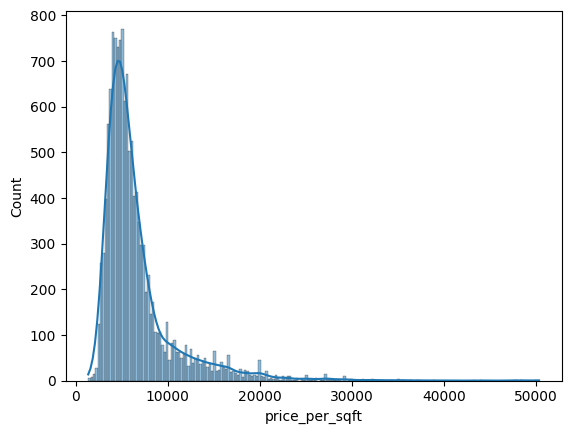

In [20]:
sns.histplot(df2.price_per_sqft, kde = True)

In [25]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\Riya arvadia\AppData\Local\Temp\ipykernel_52128\722868599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
5583,other,3 BHK,2000.0,3,120.00,3,6000,-0.160263
6804,Bommasandra Industrial Area,2 BHK,1090.0,2,31.48,2,2888,-0.911769
2313,R.T. Nagar,2 BHK,1040.0,2,46.00,2,4423,-0.541087
12886,other,3 BHK,2292.0,2,285.00,3,12434,1.393460
10094,other,4 Bedroom,2400.0,4,150.00,4,6250,-0.099892
5384,Balagere,2 BHK,1210.0,2,83.00,2,6859,0.047173
2296,Sahakara Nagar,3 BHK,1655.0,3,115.00,3,6948,0.068666
8158,Hebbal,2 BHK,1200.0,2,52.00,2,4333,-0.562821
5458,Kanakpura Road,2 BHK,1309.0,2,64.39,2,4919,-0.421310
8822,other,3 BHK,1620.0,3,95.00,3,5864,-0.193105


In [26]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [27]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407,0.903967
